In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df=pd.read_csv('Churn')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.drop('customerID',axis=1,inplace=True) #Dropping userID column (unnecessary)

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<b> TotalCharges is in the form of an object. So convert it into numeric

In [18]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

### Unable to convert as we have some blank spaces

In [19]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce') #Replace blank string with NaN
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
df['TotalCharges'].isnull().sum()

11

In [21]:
df.shape

(7043, 20)

<b>Out of 7043 rows only 11 rows have NaN values.So lets drop them

In [87]:
df[df.Churn=='Yes'].shape

(1869, 20)

In [88]:
df[df.Churn=='No'].shape

(5174, 20)

In [22]:
df[df['TotalCharges'].isnull()] #View those rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [23]:
df2=df.dropna(axis=0)
df2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df2.shape

(7032, 20)

In [25]:
df.shape[0]-df2.shape[0]

11

In [26]:
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [27]:
df2.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

## EDA

<b> Lets see the relationship between Tenure and Churn

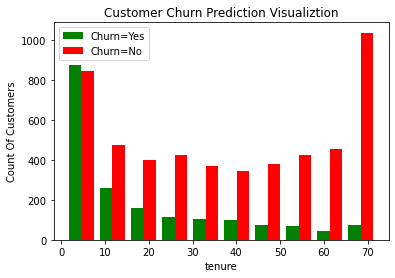

In [28]:
tenure_churn_yes=df2[df2.Churn=='Yes'].tenure
tenure_churn_no=df2[df2.Churn=='No'].tenure

plt.xlabel("tenure")
plt.ylabel("Count Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'],data=df2)

plt.legend()

<b> We observe that those with a tenure of 70 months have'nt left whereas those with a lessser tenure hv chose to leave

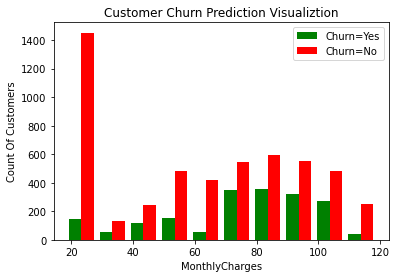

In [29]:
tenure_churn_yes=df2[df2.Churn=='Yes'].MonthlyCharges
tenure_churn_no=df2[df2.Churn=='No'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Count Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'],data=df2)

plt.legend()

<b> People who pay less monthly prefer to stay with the company.

<b> Now let's do the encoding part

In [30]:
for column in df2:
    if df2[column].dtype=='object':
        print('{}: {}'.format(column,df2[column].unique()))

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


<b> We will replace 'No internet service' and 'No phone service' with 'No'

In [31]:
df2.replace('No internet service','No',inplace=True)
df2.replace('No phone service','No',inplace=True)

C:\Users\John Joel\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [32]:
for column in df2:
    if df2[column].dtype=='object':
        print('{}: {}'.format(column,df2[column].unique()))

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


<b> Perform label encodin and one hot encoding to convert categorical values into Numerical

In [33]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [34]:
columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in columns:
    df2[i]=label.fit_transform(df2[i])
    

<ipython-input-34-5385bba4a4cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i]=label.fit_transform(df2[i])


In [35]:
for column in df2:
    print('{}: {}'.format(column,df2[column].unique()))

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [36]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [37]:
df3=pd.get_dummies(data=df2,columns=['InternetService','Contract','PaymentMethod']) #One hot encoding

In [38]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [39]:
df3.dtypes

gender                                       int32
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
MultipleLines                                int32
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### Now perform scaling

In [40]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [41]:
for column in df3:
    print('{}: {}'.format(column,df3[column].unique()))

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [42]:
X=df3.drop('Churn',axis=1)
Y=df3['Churn']

In [43]:
X.shape

(7032, 26)

In [44]:
Y.shape

(7032,)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [46]:
X_train.shape

(5625, 26)

In [47]:
X_test.shape

(1407, 26)

<b> Build a ANN using Tensorflow

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'), #Input layer
    keras.layers.Dense(15,activation='relu'),  #Hidden layer
    keras.layers.Dense(1,activation='sigmoid') #Output layer
])

In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=1000)

Epoch 1/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8373
Epoch 2/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8389
Epoch 3/1000
176/176 [==============================] - 0s 977us/step - loss: 0.3451 - accuracy: 0.8407
Epoch 4/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8414
Epoch 5/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8400
Epoch 6/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8405
Epoch 7/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8402
Epoch 8/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8411
Epoch 9/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8409
Epoch 10/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3

176/176 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8521
Epoch 81/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8524
Epoch 82/1000
176/176 [==============================] - 0s 996us/step - loss: 0.3187 - accuracy: 0.8535
Epoch 83/1000
176/176 [==============================] - 0s 972us/step - loss: 0.3182 - accuracy: 0.8540
Epoch 84/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8562
Epoch 85/1000
176/176 [==============================] - 0s 984us/step - loss: 0.3196 - accuracy: 0.8496
Epoch 86/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8530
Epoch 87/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8535
Epoch 88/1000
176/176 [==============================] - 0s 984us/step - loss: 0.3172 - accuracy: 0.8544
Epoch 89/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.

176/176 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8588
Epoch 159/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.8636
Epoch 160/1000
176/176 [==============================] - 0s 961us/step - loss: 0.3043 - accuracy: 0.8606
Epoch 161/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8626
Epoch 162/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3025 - accuracy: 0.8629
Epoch 163/1000
176/176 [==============================] - ETA: 0s - loss: 0.3019 - accuracy: 0.86 - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8603
Epoch 164/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3015 - accuracy: 0.8613
Epoch 165/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.8599
Epoch 166/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8615
Epoch 167/1000
176/176 [===========

176/176 [==============================] - 0s 932us/step - loss: 0.2909 - accuracy: 0.8686
Epoch 236/1000
176/176 [==============================] - 0s 893us/step - loss: 0.2903 - accuracy: 0.8658
Epoch 237/1000
176/176 [==============================] - 0s 937us/step - loss: 0.2888 - accuracy: 0.8702
Epoch 238/1000
176/176 [==============================] - 0s 918us/step - loss: 0.2889 - accuracy: 0.8704
Epoch 239/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2900 - accuracy: 0.8670
Epoch 240/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2901 - accuracy: 0.8699
Epoch 241/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2892 - accuracy: 0.8692
Epoch 242/1000
176/176 [==============================] - 0s 962us/step - loss: 0.2887 - accuracy: 0.8688
Epoch 243/1000
176/176 [==============================] - 0s 945us/step - loss: 0.2899 - accuracy: 0.8663
Epoch 244/1000
176/176 [==============================] - 0s 991us/

176/176 [==============================] - 0s 972us/step - loss: 0.2822 - accuracy: 0.8709
Epoch 313/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.8706
Epoch 314/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2812 - accuracy: 0.8716
Epoch 315/1000
176/176 [==============================] - 0s 941us/step - loss: 0.2806 - accuracy: 0.8724
Epoch 316/1000
176/176 [==============================] - 0s 767us/step - loss: 0.2826 - accuracy: 0.8718
Epoch 317/1000
176/176 [==============================] - 0s 959us/step - loss: 0.2821 - accuracy: 0.8713
Epoch 318/1000
176/176 [==============================] - 0s 955us/step - loss: 0.2810 - accuracy: 0.8720
Epoch 319/1000
176/176 [==============================] - 0s 991us/step - loss: 0.2818 - accuracy: 0.8720
Epoch 320/1000
176/176 [==============================] - 0s 944us/step - loss: 0.2819 - accuracy: 0.8711
Epoch 321/1000
176/176 [==============================] - 0s 1ms/

176/176 [==============================] - 0s 864us/step - loss: 0.2762 - accuracy: 0.8736
Epoch 391/1000
176/176 [==============================] - 0s 891us/step - loss: 0.2779 - accuracy: 0.8731
Epoch 392/1000
176/176 [==============================] - 0s 895us/step - loss: 0.2785 - accuracy: 0.8716
Epoch 393/1000
176/176 [==============================] - 0s 819us/step - loss: 0.2750 - accuracy: 0.8754
Epoch 394/1000
176/176 [==============================] - 0s 926us/step - loss: 0.2756 - accuracy: 0.8722
Epoch 395/1000
176/176 [==============================] - 0s 853us/step - loss: 0.2759 - accuracy: 0.8747
Epoch 396/1000
176/176 [==============================] - 0s 821us/step - loss: 0.2764 - accuracy: 0.8738
Epoch 397/1000
176/176 [==============================] - 0s 930us/step - loss: 0.2746 - accuracy: 0.8747
Epoch 398/1000
176/176 [==============================] - 0s 923us/step - loss: 0.2758 - accuracy: 0.8743
Epoch 399/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 1ms/step - loss: 0.2716 - accuracy: 0.8766
Epoch 468/1000
176/176 [==============================] - 0s 968us/step - loss: 0.2710 - accuracy: 0.8741
Epoch 469/1000
176/176 [==============================] - 0s 894us/step - loss: 0.2690 - accuracy: 0.8764
Epoch 470/1000
176/176 [==============================] - 0s 851us/step - loss: 0.2699 - accuracy: 0.8775
Epoch 471/1000
176/176 [==============================] - 0s 857us/step - loss: 0.2722 - accuracy: 0.8766
Epoch 472/1000
176/176 [==============================] - 0s 790us/step - loss: 0.2699 - accuracy: 0.8788
Epoch 473/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.8757
Epoch 474/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.8754
Epoch 475/1000
176/176 [==============================] - 0s 859us/step - loss: 0.2697 - accuracy: 0.8763
Epoch 476/1000
176/176 [==============================] - 0s 992us/

176/176 [==============================] - 0s 973us/step - loss: 0.2644 - accuracy: 0.8795
Epoch 545/1000
176/176 [==============================] - 0s 926us/step - loss: 0.2667 - accuracy: 0.8782
Epoch 546/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2659 - accuracy: 0.8786
Epoch 547/1000
176/176 [==============================] - 0s 818us/step - loss: 0.2655 - accuracy: 0.8798
Epoch 548/1000
176/176 [==============================] - 0s 916us/step - loss: 0.2647 - accuracy: 0.8775
Epoch 549/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.8791
Epoch 550/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.8786
Epoch 551/1000
176/176 [==============================] - 0s 959us/step - loss: 0.2650 - accuracy: 0.8804
Epoch 552/1000
176/176 [==============================] - 0s 863us/step - loss: 0.2648 - accuracy: 0.8793
Epoch 553/1000
176/176 [==============================] - 0s 996us/

Epoch 622/1000
176/176 [==============================] - 0s 941us/step - loss: 0.2619 - accuracy: 0.8788
Epoch 623/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.8782
Epoch 624/1000
176/176 [==============================] - 0s 885us/step - loss: 0.2638 - accuracy: 0.8768
Epoch 625/1000
176/176 [==============================] - 0s 940us/step - loss: 0.2629 - accuracy: 0.8796
Epoch 626/1000
176/176 [==============================] - 0s 951us/step - loss: 0.2617 - accuracy: 0.8798
Epoch 627/1000
176/176 [==============================] - 0s 881us/step - loss: 0.2613 - accuracy: 0.8812
Epoch 628/1000
176/176 [==============================] - 0s 889us/step - loss: 0.2622 - accuracy: 0.8821
Epoch 629/1000
176/176 [==============================] - 0s 861us/step - loss: 0.2616 - accuracy: 0.8789
Epoch 630/1000
176/176 [==============================] - 0s 880us/step - loss: 0.2623 - accuracy: 0.8777
Epoch 631/1000
176/176 [========================

176/176 [==============================] - 0s 938us/step - loss: 0.2593 - accuracy: 0.8793
Epoch 700/1000
176/176 [==============================] - 0s 916us/step - loss: 0.2599 - accuracy: 0.8782
Epoch 701/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2582 - accuracy: 0.8807
Epoch 702/1000
176/176 [==============================] - 0s 911us/step - loss: 0.2593 - accuracy: 0.8804
Epoch 703/1000
176/176 [==============================] - 0s 812us/step - loss: 0.2569 - accuracy: 0.8802
Epoch 704/1000
176/176 [==============================] - 0s 823us/step - loss: 0.2580 - accuracy: 0.8837
Epoch 705/1000
176/176 [==============================] - 0s 892us/step - loss: 0.2591 - accuracy: 0.8812
Epoch 706/1000
176/176 [==============================] - 0s 929us/step - loss: 0.2587 - accuracy: 0.8800
Epoch 707/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.8798
Epoch 708/1000
176/176 [==============================] - 0s 1ms/

176/176 [==============================] - 0s 891us/step - loss: 0.2557 - accuracy: 0.8796
Epoch 777/1000
176/176 [==============================] - 0s 928us/step - loss: 0.2562 - accuracy: 0.8828
Epoch 778/1000
176/176 [==============================] - 0s 900us/step - loss: 0.2554 - accuracy: 0.8828
Epoch 779/1000
176/176 [==============================] - 0s 987us/step - loss: 0.2558 - accuracy: 0.8809
Epoch 780/1000
176/176 [==============================] - 0s 977us/step - loss: 0.2562 - accuracy: 0.8825
Epoch 781/1000
176/176 [==============================] - 0s 886us/step - loss: 0.2561 - accuracy: 0.8836
Epoch 782/1000
176/176 [==============================] - 0s 954us/step - loss: 0.2554 - accuracy: 0.8859
Epoch 783/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2549 - accuracy: 0.8841
Epoch 784/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2555 - accuracy: 0.8834
Epoch 785/1000
176/176 [==============================] - 0s 1ms/

176/176 [==============================] - 0s 969us/step - loss: 0.2543 - accuracy: 0.8860
Epoch 854/1000
176/176 [==============================] - 0s 981us/step - loss: 0.2550 - accuracy: 0.8811
Epoch 855/1000
176/176 [==============================] - 0s 929us/step - loss: 0.2538 - accuracy: 0.8805
Epoch 856/1000
176/176 [==============================] - 0s 983us/step - loss: 0.2538 - accuracy: 0.8837
Epoch 857/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.8816
Epoch 858/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2532 - accuracy: 0.8841
Epoch 859/1000
176/176 [==============================] - 0s 982us/step - loss: 0.2547 - accuracy: 0.8834
Epoch 860/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.8834
Epoch 861/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2536 - accuracy: 0.8832
Epoch 862/1000
176/176 [==============================] - 0s 944us/st

176/176 [==============================] - 0s 956us/step - loss: 0.2518 - accuracy: 0.8843
Epoch 931/1000
176/176 [==============================] - 0s 783us/step - loss: 0.2508 - accuracy: 0.8836
Epoch 932/1000
176/176 [==============================] - 0s 973us/step - loss: 0.2541 - accuracy: 0.8820
Epoch 933/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.8832
Epoch 934/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.8848: 0s - loss: 0.2447 - accuracy: 0.88
Epoch 935/1000
176/176 [==============================] - 0s 940us/step - loss: 0.2490 - accuracy: 0.8871
Epoch 936/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2500 - accuracy: 0.8885
Epoch 937/1000
176/176 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.8843
Epoch 938/1000
176/176 [==============================] - 0s 974us/step - loss: 0.2511 - accuracy: 0.8852
Epoch 939/1000
176/176 [=========

In [52]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 955us/step - loss: 0.8463 - accuracy: 0.7662


[0.8463188409805298, 0.7661691308021545]

In [54]:
ypred=model.predict(X_test)
ypred[:4]

array([[9.0433359e-03],
       [3.0664057e-06],
       [1.8034360e-10],
       [2.0723069e-01]], dtype=float32)

In [55]:
y_pred = []
for element in ypred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [60]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

In [61]:
Y_test[:10]

5401    0
1681    0
2076    0
3359    0
6629    0
149     0
1730    1
5971    0
3050    1
1183    0
Name: Churn, dtype: int32

In [69]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1046
           1       0.54      0.58      0.56       361

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



Text(51.0, 0.5, 'Actual')

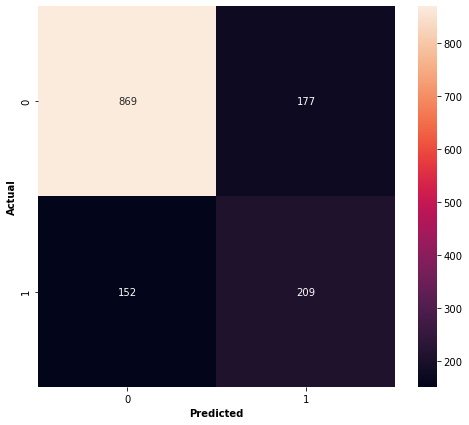

In [77]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure(figsize=(8,7))
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted',weight='bold')
plt.ylabel('Actual',weight='bold')